In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idm
import numpy as np
import warnings
#Supressing warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Creating augmentation on training variable
train_flowers=idm(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

# Passing training data to train variable
Xtrain = train_flowers.flow_from_directory('/content/drive/MyDrive/flowers/train',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 3482 images belonging to 5 classes.


In [ ]:
# Creating augmentation on testing variable
test_flowers=idm(rescale=1./255)

# Passing testing data to test variable
Xtest = test_flowers.flow_from_directory('/content/drive/MyDrive/flowers/test',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 835 images belonging to 5 classes.


In [ ]:
Flower_model = Sequential()
Flower_model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
Flower_model.add(MaxPooling2D(pool_size=(2,2)))
Flower_model.add(Flatten())
Flower_model.add(Dense(300,activation='relu'))
Flower_model.add(Dense(150,activation='relu'))
Flower_model.add(Dense(5,activation='softmax'))

In [ ]:
Flower_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
Flower_model.fit_generator(Xtrain,steps_per_epoch= len (Xtrain),epochs= 8,validation_data=Xtest,validation_steps= len (Xtest))

Epoch 1/8
35/35 [==============================] - 694s 20s/step - loss: 1.9770 - accuracy: 0.3219 - val_loss: 1.2258 - val_accuracy: 0.5078
Epoch 2/8
35/35 [==============================] - 27s 764ms/step - loss: 1.1563 - accuracy: 0.5373 - val_loss: 1.2062 - val_accuracy: 0.5150
Epoch 3/8
35/35 [==============================] - 29s 814ms/step - loss: 1.0226 - accuracy: 0.6054 - val_loss: 1.2144 - val_accuracy: 0.5449
Epoch 4/8
35/35 [==============================] - 28s 799ms/step - loss: 0.9575 - accuracy: 0.6275 - val_loss: 1.1941 - val_accuracy: 0.5665
Epoch 5/8
35/35 [==============================] - 28s 788ms/step - loss: 0.8769 - accuracy: 0.6680 - val_loss: 1.0775 - val_accuracy: 0.6048
Epoch 6/8
35/35 [==============================] - 29s 827ms/step - loss: 0.8298 - accuracy: 0.6841 - val_loss: 0.9669 - val_accuracy: 0.6647
Epoch 7/8
35/35 [==============================] - 27s 779ms/step - loss: 0.7983 - accuracy: 0.6999 - val_loss: 1.1064 - val_accuracy: 0.5988
Epoch 8

In [ ]:
Flower_model.save('Flower.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

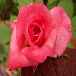

In [ ]:
test_img=image.load_img('/content/drive/MyDrive/flowers/validate/rose.jpg',target_size=(76,76))
test_img

In [ ]:
x=image.img_to_array(test_img)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category=['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]

1/1 [==============================] - 0s 29ms/step


'rose'

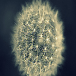

In [ ]:
test_img=image.load_img('/content/drive/MyDrive/flowers/validate/dandelion.jpg',target_size=(76,76))
test_img

In [ ]:
x=image.img_to_array(test_img)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category=['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]

1/1 [==============================] - 0s 19ms/step


'dandelion'

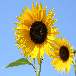

In [ ]:
test_img=image.load_img('/content/drive/MyDrive/flowers/validate/sunflower.jpg',target_size=(76,76))
test_img

In [ ]:
x=image.img_to_array(test_img)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category=['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]

1/1 [==============================] - 0s 27ms/step


'sunflower'

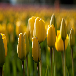

In [ ]:
test_img=image.load_img('/content/drive/MyDrive/flowers/validate/tulip.jpg',target_size=(76,76))
test_img

In [ ]:
x=image.img_to_array(test_img)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category=['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]

1/1 [==============================] - 0s 21ms/step


'tulip'